# PCA dimensionality reduction

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from src.feature_selection import analyse_pca, find_n_components, find_max_contributor

## Read in scaled features

In [2]:
df = pd.read_csv("../data/cohort_features_scaled.csv", index_col="ID")
df.head(5)

,n_stays,admission_age,suspected_infection,weight,height,heart_rate_min,heart_rate_max,temperature_min,temperature_max,mbp_min,...,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT,gender_F,gender_M,ventilation_status_HFNC,ventilation_status_InvasiveVent,ventilation_status_NonInvasiveVent,ventilation_status_None,ventilation_status_SupplementalOxygen,ventilation_status_Tracheostomy
ID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.277778,0.0,0.362486,0.671053,0.426357,0.403846,0.818868,0.551402,0.61,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.638889,1.0,0.550055,0.473684,0.558140,0.532051,0.794340,0.598131,0.64,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000000,0.347222,1.0,0.619411,0.763158,0.550388,0.448718,0.825786,0.644860,0.51,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.638889,1.0,0.334787,0.368421,0.302326,0.442308,0.780503,0.634579,0.43,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.166667,0.750000,0.0,0.383860,0.736842,0.271318,0.410256,0.808805,0.551402,0.41,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Find number of components required

Target explained variance 90%

In [3]:
# Fit the PCA estimator using maximum number of features
pca = PCA(
    n_components=len(df.columns.values),
    random_state=42
)
pca.fit(df)

# Find the number of components required
explained_variance_required = 90
n_components = find_n_components(pca, explained_variance_required)
n_components

26

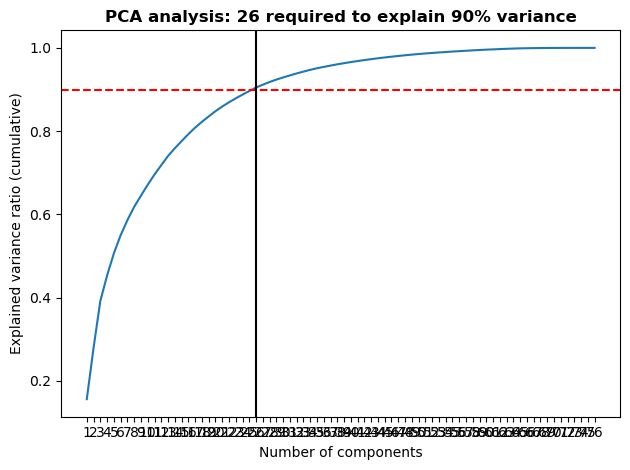

In [4]:
analyse_pca(df, explained_variance_required)

## Find the biggest contributors to each of the components

PCA can be used for feature selection by finding the biggest features to each of the principal components.

In [4]:
# Fit the PCA using the required number of components
pca = PCA(n_components=n_components, random_state=42)
pca.fit(df)

PCA(n_components=26, random_state=42)

### Find max contributor to PC1 and PC2

In [7]:
# PC1
feature_index = find_max_contributor(pca, 0)
df.columns.values[feature_index]

'gender_F'

In [8]:
# PC2
feature_index = find_max_contributor(pca, 1)
df.columns.values[feature_index]

'admission_type_EW EMER.'